## Models 

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## variables
- at - Assets  Total
- 'dbtb' - Debt at Beginning of Year
- 'dbte' - Debt at End of Year
- 'dlc'-  Debt in Current Liabilities  Total ( short tern Debt)
- 'dltt'- Long Term Debt Total 
- 'ebit'- Earnings Before Interest and Taxes
- 'ebitda' - Earnings Before Interest
- 'intpn' - Interest Paid  Net
- 'nicon' - Net Income (Loss)  Consolidated 
- 'lt' - Liabilities Total 
- 'revt' -  Revenue Total 
- 'txt' - Income Taxes Total 
- INTAN - Intangible Assets Total

## Required Ratio
- short term Debt to Total Assets (STDTA) : dlc/at
- Long term debt to total assets (LDTA) : DLTT/AT
- Total Debt to Total Assets (TDTA) : DBTE/AT
- Ebitda to Total liabilities (EDLT) : EBITDA/LT
- Interest Coverage ratio(ICRI) : EBITDA/intpn
- Earning Before Tax to Equity Ratio (EDEQ): EBITDA / rveqt
- Gross profit Margin (EDRV) : EBITDA/ revt
- Asset Turnover Ratio (RVAT) : REVT/AT
- ROA :  EBITDA/AT

In [5]:
df_var = pd.read_csv("cleaned_financial_data.csv")
df_var_Asset = pd.read_csv('cleaned_financial_data_rel_Asset.csv')
df_ratio = pd.read_csv("ratio_comp.csv")

In [6]:
df_var.head()

Unnamed: 0  fyear                  conm   sic       at      dlc     dltt  \
0           0   1996  ASM INTERNATIONAL NV  3559  611.980   88.641   87.975   
1           1   1997  ASM INTERNATIONAL NV  3559  724.115  266.221  102.718   
2           2   1998  ASM INTERNATIONAL NV  3559  623.539  144.215  189.325   
3           3   1999  ASM INTERNATIONAL NV  3559  425.035  111.896    7.997   
4           4   2000  ASM INTERNATIONAL NV  3559  777.940   44.620   31.660   

      dbte   ebitda     intpn       lt     revt    rveqt       ROA   nxt_ROA  
0  176.616  132.496  7.213733  336.105  658.238  275.875  0.216504 -0.100285  
1  368.939  -72.618  7.213733  573.551  708.673  150.564 -0.100285  0.126611  
2  333.540   78.947  7.213733  472.998  634.913  150.541  0.126611  0.150204  
3  119.893   63.842  8.859000  289.353  414.495  135.682  0.150204  0.319163  
4   76.280  248.290  2.257000  359.687  935.212  418.253  0.319163  0.088518

In [7]:
df_var_Asset.head()

Unnamed: 0  fyear                  conm   sic       ROA   nxt_ROA  \
0           0   1996  ASM INTERNATIONAL NV  3559  0.216504 -0.100285   
1           1   1997  ASM INTERNATIONAL NV  3559 -0.100285  0.126611   
2           2   1998  ASM INTERNATIONAL NV  3559  0.126611  0.150204   
3           3   1999  ASM INTERNATIONAL NV  3559  0.150204  0.319163   
4           4   2000  ASM INTERNATIONAL NV  3559  0.319163  0.088518   

        dlc      dltt      dbte    ebitda     intpn        lt      revt  \
0  0.144843  0.143755  0.288598  0.216504  0.011788  0.549209  1.075587   
1  0.367650  0.141853  0.509503 -0.100285  0.009962  0.792072  0.978675   
2  0.231285  0.303630  0.534914  0.126611  0.011569  0.758570  1.018241   
3  0.263263  0.018815  0.282078  0.150204  0.020843  0.680775  0.975202   
4  0.057357  0.040697  0.098054  0.319163  0.002901  0.462358  1.202165   

      rveqt  
0  0.450791  
1  0.207928  
2  0.241430  
3  0.319225  
4  0.537642

In [8]:
df_ratio.head()

Unnamed: 0  fyear                  conm   sic     STDTA      LDTA  \
0           0   1996  ASM INTERNATIONAL NV  3559  0.144843  0.143755   
1           1   1997  ASM INTERNATIONAL NV  3559  0.367650  0.141853   
2           2   1998  ASM INTERNATIONAL NV  3559  0.231285  0.303630   
3           3   1999  ASM INTERNATIONAL NV  3559  0.263263  0.018815   
4           4   2000  ASM INTERNATIONAL NV  3559  0.057357  0.040697   

       TDTA      EDLT        ICRI      EDEQ      EDRV      RVAT       ROA  \
0  0.288598  0.394210   18.367189  0.480275  0.201289  1.075587  0.216504   
1  0.509503 -0.126611  -10.066632 -0.482307 -0.102470  0.978675 -0.100285   
2  0.534914  0.166908   10.943986  0.524422  0.124343  1.018241  0.126611   
3  0.282078  0.220637    7.206457  0.470527  0.154024  0.975202  0.150204   
4  0.098054  0.690295  110.008861  0.593636  0.265491  1.202165  0.319163   

    nxt_ROA  
0 -0.100285  
1  0.126611  
2  0.150204  
3  0.319163  
4  0.088518

## Box plot

Text(0.5, 1.0, 'ROA')

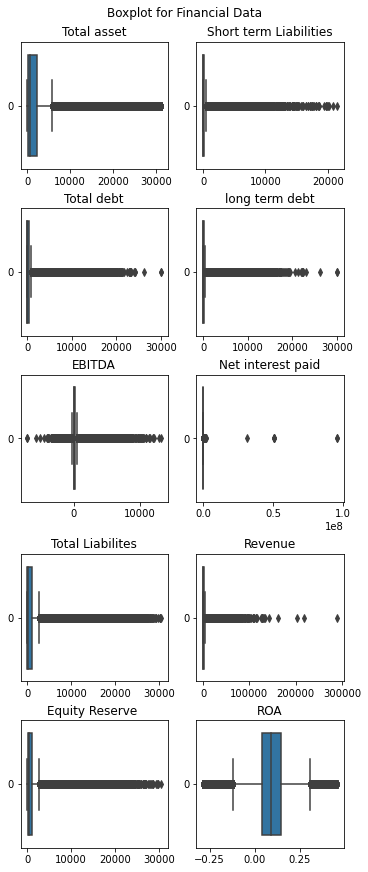

In [9]:
col = ['at', 'dlc', 'dltt', 'dbte', 'ebitda', 'intpn', 'lt', 'revt', 'rveqt','ROA']

fig, axes = plt.subplots(5,2, figsize=(5, 12),constrained_layout = True)
fig.suptitle('Boxplot for Financial Data')


sns.boxplot(ax= axes[0,0], data=df_var['at'],orient = "h" )
axes[0,0].set_title('Total asset')

sns.boxplot(ax=axes[0,1], data=df_var['dlc'],orient = "h" )
axes[0,1].set_title('Short term Liabilities')

sns.boxplot(ax=axes[1,0], data=df_var['dbte'],orient = "h" )
axes[1,0].set_title('Total debt')

sns.boxplot(ax=axes[1,1], data=df_var['dltt'],orient = "h" )
axes[1,1].set_title('long term debt')

sns.boxplot(ax=axes[2,0], data=df_var['ebitda'],orient = "h" )
axes[2,0].set_title('EBITDA')

sns.boxplot(ax=axes[2,1], data=df_var['intpn'],orient = "h" )
axes[2,1].set_title('Net interest paid')

sns.boxplot(ax=axes[3,0], data=df_var['lt'],orient = "h" )
axes[3,0].set_title('Total Liabilites')

sns.boxplot(ax=axes[3,1], data=df_var['revt'],orient = "h" )
axes[3,1].set_title('Revenue')

sns.boxplot(ax=axes[4,0], data=df_var['rveqt'],orient = "h" )
axes[4,0].set_title('Equity Reserve ')

sns.boxplot(ax=axes[4,1], data=df_var['ROA'],orient = "h" )
axes[4,1].set_title('ROA')

## data Relative to Asset Size

Text(0.5, 1.0, 'nxt_ROA')

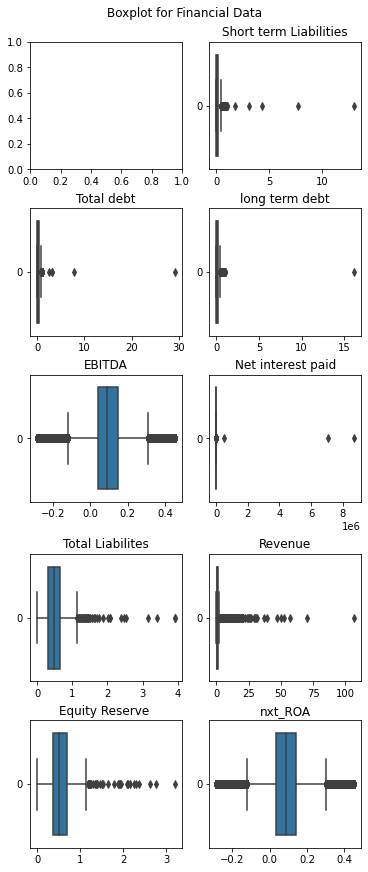

In [10]:
col = [ 'dlc', 'dltt', 'dbte', 'ebitda', 'intpn', 'lt', 'revt', 'rveqt','nxt_ROA']

fig, axes = plt.subplots(5,2, figsize=(5, 12),constrained_layout = True)
fig.suptitle('Boxplot for Financial Data')


sns.boxplot(ax=axes[0,1], data=df_var_Asset['dlc'],orient = "h" )
axes[0,1].set_title('Short term Liabilities')

sns.boxplot(ax=axes[1,0], data=df_var_Asset['dbte'],orient = "h" )
axes[1,0].set_title('Total debt')

sns.boxplot(ax=axes[1,1], data=df_var_Asset['dltt'],orient = "h" )
axes[1,1].set_title('long term debt')

sns.boxplot(ax=axes[2,0], data=df_var_Asset['ebitda'],orient = "h" )
axes[2,0].set_title('EBITDA')

sns.boxplot(ax=axes[2,1], data=df_var_Asset['intpn'],orient = "h" )
axes[2,1].set_title('Net interest paid')

sns.boxplot(ax=axes[3,0], data=df_var_Asset['lt'],orient = "h" )
axes[3,0].set_title('Total Liabilites')

sns.boxplot(ax=axes[3,1], data=df_var_Asset['revt'],orient = "h" )
axes[3,1].set_title('Revenue')

sns.boxplot(ax=axes[4,0], data=df_var_Asset['rveqt'],orient = "h" )
axes[4,0].set_title('Equity Reserve ')

sns.boxplot(ax=axes[4,1], data=df_var_Asset['nxt_ROA'],orient = "h" )
axes[4,1].set_title('nxt_ROA')

## Financial ratio

Text(0.5, 1.0, 'ROA')

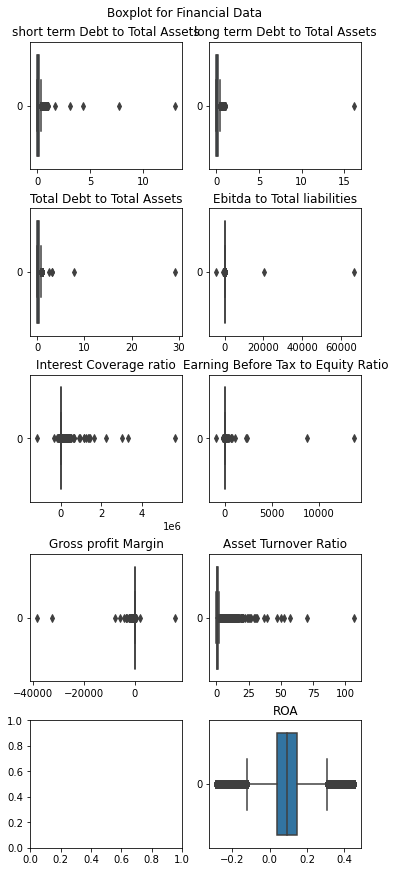

In [11]:
fig, axes = plt.subplots(5,2, figsize=(5, 12),constrained_layout = True)
fig.suptitle('Boxplot for Financial Data')

sns.boxplot(ax= axes[0,0], data=df_ratio['STDTA'],orient = "h" )
axes[0,0].set_title('short term Debt to Total Assets')

sns.boxplot(ax=axes[0,1], data=df_ratio['LDTA'],orient = "h" )
axes[0,1].set_title('long term Debt to Total Assets')

sns.boxplot(ax=axes[1,0], data=df_ratio['TDTA'],orient = "h" )
axes[1,0].set_title('Total Debt to Total Assets')

sns.boxplot(ax=axes[1,1], data=df_ratio['EDLT'],orient = "h" )
axes[1,1].set_title('Ebitda to Total liabilities')

sns.boxplot(ax=axes[2,0], data=df_ratio['ICRI'],orient = "h" )
axes[2,0].set_title('Interest Coverage ratio')

sns.boxplot(ax=axes[2,1], data=df_ratio['EDEQ'],orient = "h" )
axes[2,1].set_title('Earning Before Tax to Equity Ratio')

sns.boxplot(ax=axes[3,0], data=df_ratio['EDRV'],orient = "h" )
axes[3,0].set_title('Gross profit Margin')

sns.boxplot(ax=axes[3,1], data=df_ratio['RVAT'],orient = "h" )
axes[3,1].set_title('Asset Turnover Ratio')

sns.boxplot(ax=axes[4,1], data=df_ratio['ROA'],orient = "h" )
axes[4,1].set_title('ROA')

## Desriptive Statistics

In [12]:
## Fianacial Variables
df_var.describe()

Unnamed: 0          fyear            sic             at  \
count  258250.000000  258250.000000  258250.000000  258250.000000   
mean   129124.500000    2005.894699    3934.750594    2502.630456   
std     74550.497847       5.946788    1986.000688    4780.318444   
min         0.000000    1987.000000     100.000000       1.000000   
25%     64562.250000    2002.000000    2721.000000     130.316000   
50%    129124.500000    2007.000000    3559.000000     623.816000   
75%    193686.750000    2011.000000    4941.000000    2359.491250   
max    258249.000000    2016.000000    9998.000000   31179.000000   

                 dlc           dltt           dbte         ebitda  \
count  258250.000000  258250.000000  258250.000000  258250.000000   
mean      303.190407     374.123093     608.118014     256.362115   
std       847.840921    1152.397404    1638.082028     648.296726   
min         0.000000       0.000000       0.000000   -7023.166000   
25%         1.357000       0.000000       1.048000       5.050000   
50%        30.064000      16.100500      45.964500      44.100000   
75%       210.786750     178.558000     371.620500     204.405250   
max     21453.426000   30000.000000   30000.000000   13168.364000   

              intpn             lt           revt          rveqt  \
count  2.582500e+05  258250.000000  258250.000000  258250.000000   
mean   1.759405e+03    1327.770028    2170.927923    1175.065170   
std    3.386134e+05    2836.950775    5190.375277    2389.901849   
min   -9.567527e+04       0.000000       0.000000       0.000000   
25%    6.600000e-02      49.854250      88.334000      61.564500   
50%    2.145000e+00     259.212000     446.781000     283.997000   
75%    2.104275e+01    1122.182000    1815.078500    1111.681500   
max    9.595613e+07   30366.486000  288869.218000   30450.725000   

                 ROA        nxt_ROA  
count  258250.000000  258250.000000  
mean        0.091992       0.087552  
std         0.098483       0.098018  
min        -0.285424      -0.285533  
25%         0.039207       0.036168  
50%         0.091294       0.087997  
75%         0.146507       0.142113  
max         0.454116       0.454176

In [13]:
## Fianacial Variables with respect to Total Assets size
df_var_Asset.describe()


Unnamed: 0          fyear            sic            ROA  \
count  258250.000000  258250.000000  258250.000000  258250.000000   
mean   129124.500000    2005.894699    3934.750594       0.091992   
std     74550.497847       5.946788    1986.000688       0.098483   
min         0.000000    1987.000000     100.000000      -0.285424   
25%     64562.250000    2002.000000    2721.000000       0.039207   
50%    129124.500000    2007.000000    3559.000000       0.091294   
75%    193686.750000    2011.000000    4941.000000       0.146507   
max    258249.000000    2016.000000    9998.000000       0.454116   

             nxt_ROA            dlc           dltt           dbte  \
count  258250.000000  258250.000000  258250.000000  258250.000000   
mean        0.087552       0.109894       0.109776       0.199271   
std         0.098018       0.126519       0.143014       0.197843   
min        -0.285533       0.000000       0.000000       0.000000   
25%         0.036168       0.009446       0.000000       0.012494   
50%         0.087997       0.069625       0.052946       0.164220   
75%         0.142113       0.170321       0.172689       0.326542   
max         0.454176      13.011029      16.175920      29.186948   

              ebitda         intpn             lt           revt  \
count  258250.000000  2.582500e+05  258250.000000  258250.000000   
mean        0.091992  6.362979e+01       0.478028       0.963254   
std         0.098483  2.220157e+04       0.219485       0.888437   
min        -0.285424 -3.646853e+01       0.000000       0.000000   
25%         0.039207  6.831459e-04       0.318273       0.455487   
50%         0.091294  8.825038e-03       0.488797       0.812302   
75%         0.146507  2.405347e-02       0.640215       1.258084   
max         0.454116  8.746343e+06       3.921714     106.888141   

               rveqt  
count  258250.000000  
mean        0.522355  
std         0.219228  
min         0.000000  
25%         0.359877  
50%         0.511274  
75%         0.681895  
max         3.200015

In [14]:
## Financial ratio
df_ratio.describe()

Unnamed: 0          fyear            sic          STDTA  \
count  258250.000000  258250.000000  258250.000000  258250.000000   
mean   129124.500000    2005.894699    3934.750594       0.109894   
std     74550.497847       5.946788    1986.000688       0.126519   
min         0.000000    1987.000000     100.000000       0.000000   
25%     64562.250000    2002.000000    2721.000000       0.009446   
50%    129124.500000    2007.000000    3559.000000       0.069625   
75%    193686.750000    2011.000000    4941.000000       0.170321   
max    258249.000000    2016.000000    9998.000000      13.011029   

                LDTA           TDTA           EDLT          ICRI  \
count  258250.000000  258250.000000  258144.000000  2.128380e+05   
mean        0.109776       0.199271       0.515877  3.553128e+02   
std         0.143014       0.197843     137.857733  1.936219e+04   
min         0.000000       0.000000   -4249.000000 -1.154978e+06   
25%         0.000000       0.012494       0.077431  1.359046e+00   
50%         0.052946       0.164220       0.184483  5.251877e+00   
75%         0.172689       0.326542       0.346051  1.720113e+01   
max        16.175920      29.186948   66897.000000  5.630644e+06   

                EDEQ           EDRV           RVAT            ROA  \
count  258199.000000  253311.000000  258250.000000  258250.000000   
mean        0.353831      -0.770404       0.963254       0.091992   
std        33.040842     108.386015       0.888437       0.098483   
min      -875.000000  -38239.000000       0.000000      -0.285424   
25%         0.075211       0.048119       0.455487       0.039207   
50%         0.191032       0.107010       0.812302       0.091294   
75%         0.330709       0.186148       1.258084       0.146507   
max     13762.000000   15657.812500     106.888141       0.454116   

             nxt_ROA  
count  258250.000000  
mean        0.087552  
std         0.098018  
min        -0.285533  
25%         0.036168  
50%         0.087997  
75%         0.142113  
max         0.454176

## Linear Regression Models

In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## with Respect to Financial Variables

In [16]:
df_var.columns

Index(['Unnamed: 0', 'fyear', 'conm', 'sic', 'at', 'dlc', 'dltt', 'dbte',
       'ebitda', 'intpn', 'lt', 'revt', 'rveqt', 'ROA', 'nxt_ROA'],
      dtype='object')

[Text(0, 0.5, 'at'),
 Text(0, 1.5, 'dlc'),
 Text(0, 2.5, 'dltt'),
 Text(0, 3.5, 'dbte'),
 Text(0, 4.5, 'ebitda'),
 Text(0, 5.5, 'intpn'),
 Text(0, 6.5, 'lt'),
 Text(0, 7.5, 'revt'),
 Text(0, 8.5, 'rveqt'),
 Text(0, 9.5, 'ROA'),
 Text(0, 10.5, 'nxt_ROA')]

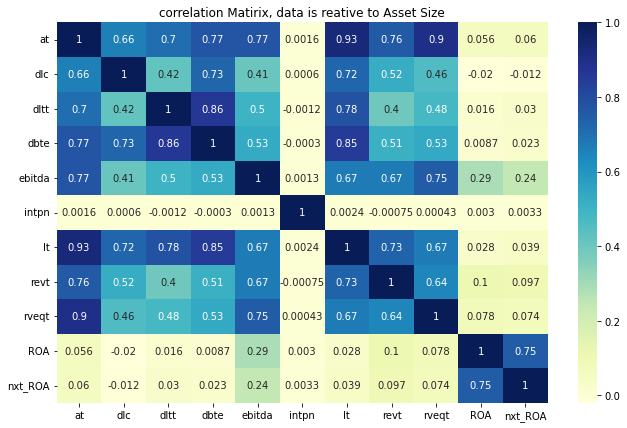

In [17]:
cols = [ 'at', 'dlc', 'dltt', 'dbte','ebitda', 'intpn', 'lt', 'revt', 'rveqt', 'ROA', 'nxt_ROA']
plt.figure(figsize = (11,7))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix, data is reative to Asset Size')
g = sns.heatmap(df_var.loc[:, cols].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

#### Total Asset('at') is highlt correlated to other financial variablbles 

##  Financial Variables with Respect to Total Asset Size

In [18]:
df_var_Asset.columns

Index(['Unnamed: 0', 'fyear', 'conm', 'sic', 'ROA', 'nxt_ROA', 'dlc', 'dltt',
       'dbte', 'ebitda', 'intpn', 'lt', 'revt', 'rveqt'],
      dtype='object')

[Text(0, 0.5, 'dlc'),
 Text(0, 1.5, 'dltt'),
 Text(0, 2.5, 'dbte'),
 Text(0, 3.5, 'ebitda'),
 Text(0, 4.5, 'intpn'),
 Text(0, 5.5, 'lt'),
 Text(0, 6.5, 'revt'),
 Text(0, 7.5, 'rveqt'),
 Text(0, 8.5, 'nxt_ROA')]

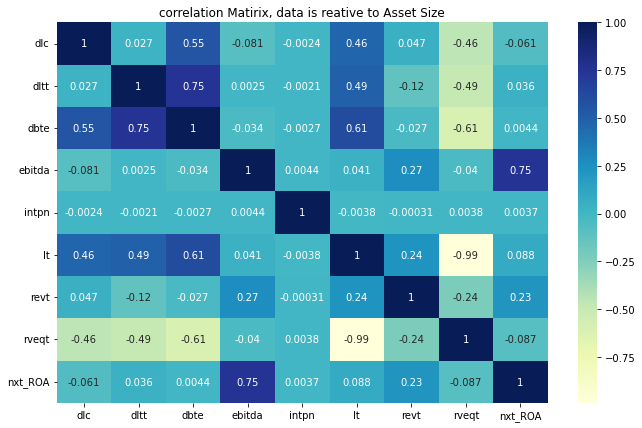

In [19]:
cols = ['dlc', 'dltt','dbte', 'ebitda', 'intpn', 'lt', 'revt', 'rveqt','nxt_ROA']
plt.figure(figsize = (11,7))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix, data is reative to Asset Size')
g = sns.heatmap(df_var_Asset.loc[:, cols].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

In [20]:
## Case 1

In [21]:
cols = ['dlc', 'dltt','dbte',  'intpn', 'lt', 'revt', 'rveqt','ebitda']   ## Here EBIDTA and ROA is same since w.r.to Asset
x = df_var_Asset[cols]
y = df_var_Asset['nxt_ROA']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                          7.104e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:00:49   Log-Likelihood:                      2.3884e+05
No. Observations:              180775   AIC:                                 -4.777e+05
Df Residuals:                  180767   BIC:                                 -4.776e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

eval_env: 1


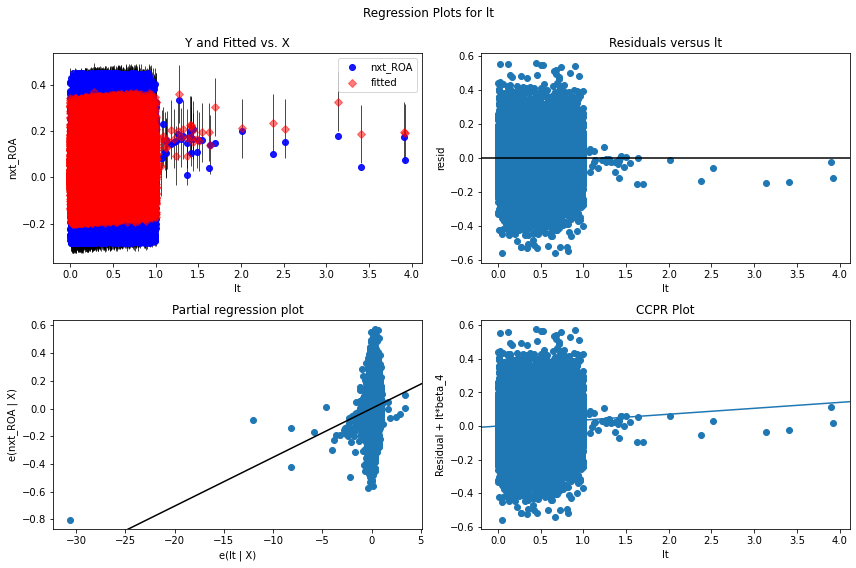

In [22]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'lt',fig=fig)

In [23]:
##  Perfomance Matrics

print('R2 for Train data',result.rsquared)
## root mean square of error
print('RMSE for Test data',np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 


R2 for Train data 0.7586958924203497
RMSE for Test data 0.0646532134559667
RMSE for Train data 0.0646532134559667


Text(0.5, 1.0, 'Residual Distribution of test Datasets')

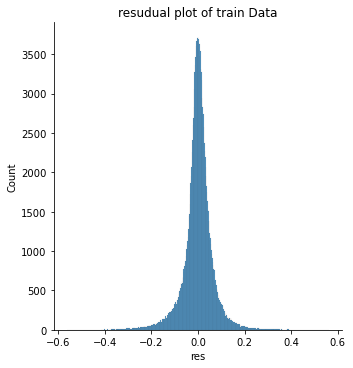

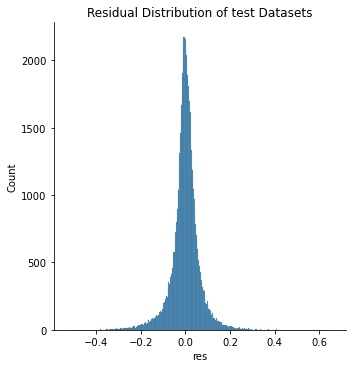

In [24]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
sns.displot(df.res)
plt.title('resudual plot of train Data')

sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')


In [25]:
# CASE=2   ## When Removing The Current ROA and EBIDTA

cols = ['dlc', 'dltt','dbte', 'intpn', 'lt', 'revt', 'rveqt']
x = df_var_Asset[cols]
y = df_var_Asset['nxt_ROA']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                          2.369e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:01:10   Log-Likelihood:                      1.6888e+05
No. Observations:              180775   AIC:                                 -3.377e+05
Df Residuals:                  180768   BIC:                                 -3.377e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

eval_env: 1


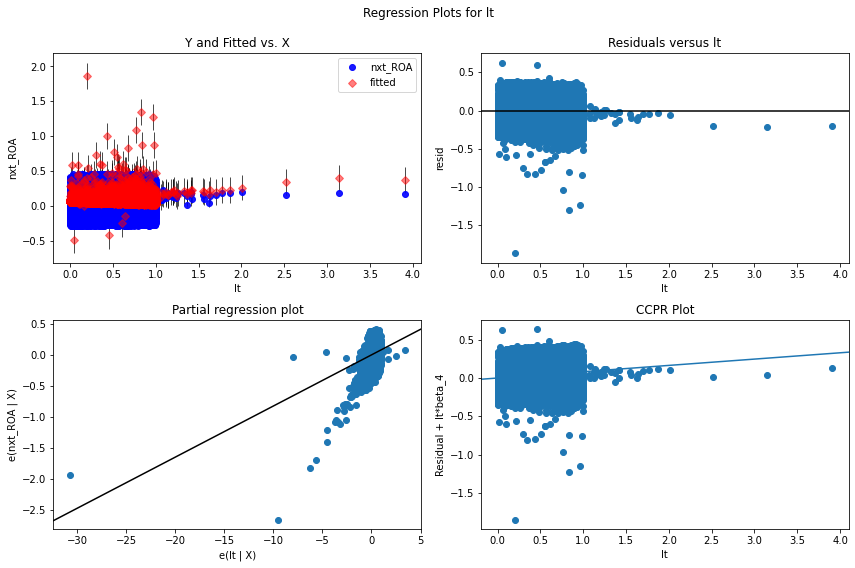

In [26]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'lt',fig=fig)

In [27]:
##  Perfomance Matrics

print('R2 for Train data',result.rsquared)

## root mean square of error
print('RMSE for Test data',np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 


R2 for Train data 0.47844585815842455
RMSE for Test data 0.09452779386442207
RMSE for Train data 0.09452779386442207


Text(0.5, 1.0, 'Residual Distribution of test Datasets')

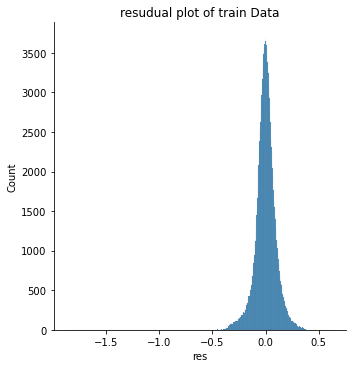

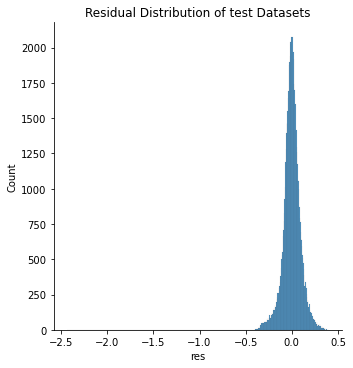

In [28]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
sns.displot(df.res)
plt.title('resudual plot of train Data')

sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')

In [29]:
## CASE -  3 ONLY EBIDTA

cols = ['ebitda']
x = df_var_Asset[cols]
y = df_var_Asset['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 
result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                          5.323e+05
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:01:30   Log-Likelihood:                      2.3455e+05
No. Observations:              180775   AIC:                                 -4.691e+05
Df Residuals:                  180774   BIC:                                 -4.691e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
##  Perfomance Matrics

print('R2 for Train data', result.rsquared)



## root mean square of error
print('RMSE for Test data',metrics.mean_squared_error(y_test, result.predict(X_test)))
print('RMSE for Train data', metrics.mean_squared_error(y_test, result.predict(X_test)))


R2 for Train data 0.7464767465773221
RMSE for Test data 0.004481102251422866
RMSE for Train data 0.004481102251422866


eval_env: 1


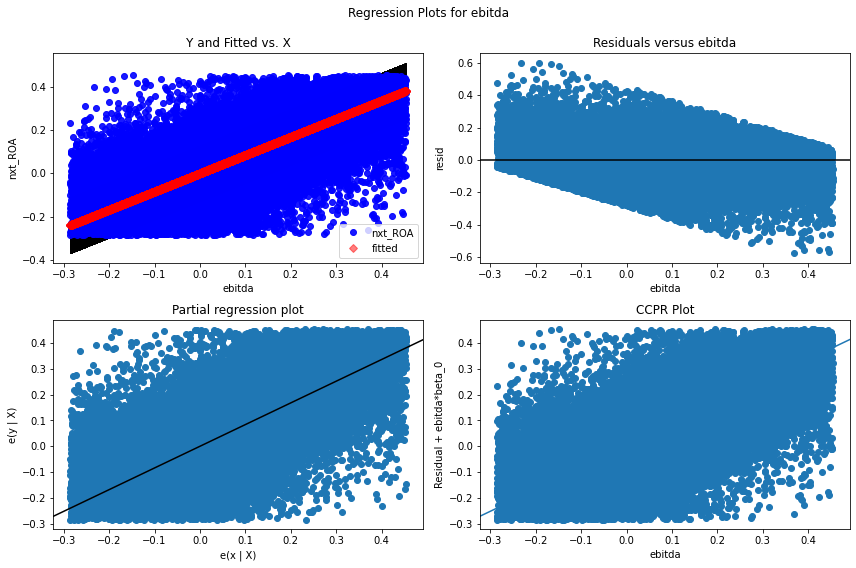

In [31]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result, 'ebitda',fig=fig)

Text(0.5, 1.0, 'resudual plot of train Data')

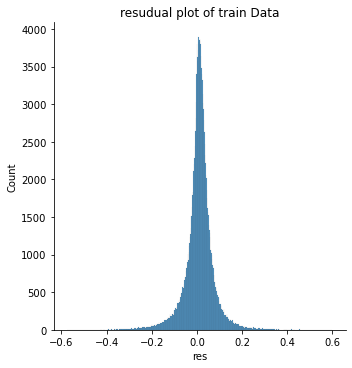

In [32]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
sns.displot(df.res)
plt.title('resudual plot of train Data')


Text(0.5, 1.0, 'Residual Distribution of test Datasets')

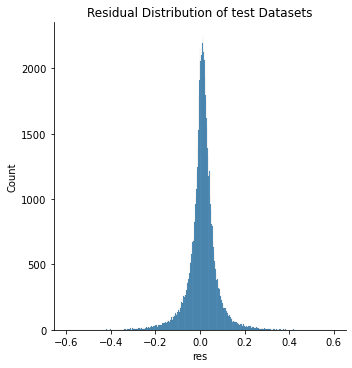

In [33]:
sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')

## Case 3 : Use Financial Ratio

In [34]:
df_ratio = pd.read_csv("ratio_comp.csv")

In [35]:
df_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ratio.dropna(inplace = True)

In [36]:
df_ratio.drop(['Unnamed: 0', 'fyear', 'conm','sic'],axis = 1,inplace = True)

- One disadvantage of normalization over standardization is that it loses some information in the data, especially about outliers.

## Analysis With  standarized

In [37]:
## Making dataFrame standarized

import pandas as pd
from sklearn import preprocessing 
colms = ['STDTA', 'LDTA', 'TDTA', 'EDLT', 'ICRI', 'EDEQ', 'EDRV', 'RVAT','ROA', 'nxt_ROA']
x = df_ratio.values   #returns a numpy array

min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_ratio_scaled= pd.DataFrame(x_scaled, columns =colms )

In [38]:
df_ratio_scaled.describe()

STDTA          LDTA          TDTA          EDLT          ICRI  \
count  2.084340e+05  2.084340e+05  2.084340e+05  2.084340e+05  2.084340e+05   
mean  -2.223968e-14 -5.918057e-15  3.816392e-16 -1.973286e-17  2.714656e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -8.415731e-01 -8.158133e-01 -1.138556e+00 -8.259134e-01 -5.905860e+01   
25%   -7.645407e-01 -8.020458e-01 -8.404459e-01 -3.686814e-03 -1.871467e-02   
50%   -3.260791e-01 -3.583601e-01 -1.287212e-01 -2.999699e-03 -1.851466e-02   
75%    4.356271e-01  4.759372e-01  6.293956e-01 -1.963309e-03 -1.788862e-02   
max    1.037854e+02  1.078830e+02  1.461616e+02  4.368996e+02  2.878068e+02   

               EDEQ          EDRV          RVAT           ROA       nxt_ROA  
count  2.084340e+05  2.084340e+05  2.084340e+05  2.084340e+05  2.084340e+05  
mean  -3.664759e-18  9.470295e-18  1.696111e-16 -2.145255e-16 -1.608804e-16  
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  
min   -2.380673e+01 -3.204513e+02 -1.095905e+00 -3.851849e+00 -3.812264e+00  
25%   -8.763512e-03  8.000384e-03 -5.636613e-01 -5.392453e-01 -5.278722e-01  
50%   -5.400521e-03  8.490433e-03 -1.622745e-01 -1.427872e-04  1.272758e-02  
75%   -1.479641e-03  9.143921e-03  3.251293e-01  5.528385e-01  5.572428e-01  
max    3.742472e+02  1.312267e+02  1.140493e+02  3.609602e+00  3.655635e+00

In [39]:
df_ratio_scaled.columns

Index(['STDTA', 'LDTA', 'TDTA', 'EDLT', 'ICRI', 'EDEQ', 'EDRV', 'RVAT', 'ROA',
       'nxt_ROA'],
      dtype='object')

## Removing Outlier

In [40]:
col = [ 'TDTA']
low_lim = []
upp_lim = []
for i in col :
    
    #Q1 = np.percentile(df_ratio_scaled[i], 25, interpolation = 'midpoint')
    Q2 = np.percentile(df_ratio_scaled[i], 50, interpolation = 'midpoint')
    #Q3 = np.percentile(df_ratio_scaled[i], 75, interpolation = 'midpoint')
    
    lw_lim = Q2 - 3 * np.std(df_ratio_scaled[i])
    up_lim = Q2 + 3 * np.std(df_ratio_scaled[i])
    low_lim.append(lw_lim)
    upp_lim.append(up_lim )

In [41]:
## Updatind DateFrame with Removing Outlier
df_ratio_scaled_range = df_ratio_scaled.copy()
for i in col :
    for j,k in zip(low_lim,upp_lim):
        df_ratio_scaled_range = df_ratio_scaled_range[(j <= df_ratio_scaled[i]) & (df_ratio_scaled[i] <= k)]

In [42]:
df_ratio_scaled_range.describe()

STDTA           LDTA           TDTA           EDLT  \
count  207743.000000  207743.000000  207743.000000  207743.000000   
mean       -0.005632      -0.010435      -0.011441       0.000013   
std         0.951229       0.950942       0.926385       1.001664   
min        -0.841573      -0.815813      -1.138556      -0.825913   
25%        -0.764890      -0.802363      -0.842949      -0.003683   
50%        -0.327026      -0.361761      -0.133318      -0.002995   
75%         0.431313       0.467648       0.620719      -0.001959   
max         5.544686       4.519704       2.870757     436.899649   

                ICRI           EDEQ           EDRV           RVAT  \
count  207743.000000  207743.000000  207743.000000  207743.000000   
mean        0.000050      -0.000746      -0.000014       0.002081   
std         1.001646       0.988220       1.001661       1.000250   
min       -59.058603     -23.806727    -320.451332      -1.095905   
25%        -0.018714      -0.008759       0.008001      -0.561148   
50%        -0.018513      -0.005405       0.008490      -0.160225   
75%        -0.017884      -0.001499       0.009142       0.326939   
max       287.806753     374.247158     131.226683     114.049255   

                 ROA        nxt_ROA  
count  207743.000000  207743.000000  
mean        0.002094       0.001467  
std         0.999667       0.999755  
min        -3.851849      -3.812264  
25%        -0.536728      -0.525624  
50%         0.001760       0.014184  
75%         0.554704       0.558209  
max         3.609602       3.655635

[Text(0, 0.5, 'STDTA'),
 Text(0, 1.5, 'LDTA'),
 Text(0, 2.5, 'TDTA'),
 Text(0, 3.5, 'EDLT'),
 Text(0, 4.5, 'ICRI'),
 Text(0, 5.5, 'EDEQ'),
 Text(0, 6.5, 'EDRV'),
 Text(0, 7.5, 'RVAT'),
 Text(0, 8.5, 'ROA'),
 Text(0, 9.5, 'nxt_ROA')]

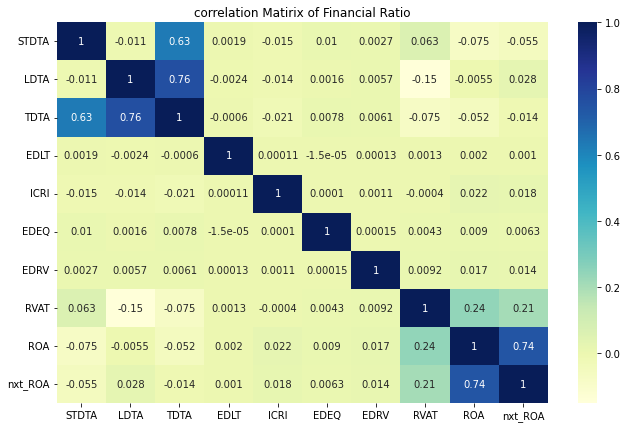

In [43]:
cols = ['STDTA', 'LDTA', 'TDTA', 'EDLT','ICRI', 'EDEQ', 'EDRV', 'RVAT', 'ROA', 'nxt_ROA']

plt.figure(figsize = (11,7))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix of Financial Ratio')
g = sns.heatmap(df_ratio_scaled_range[cols].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

## Using All Fin_ratio

Text(0.5, 1.0, 'ROA')

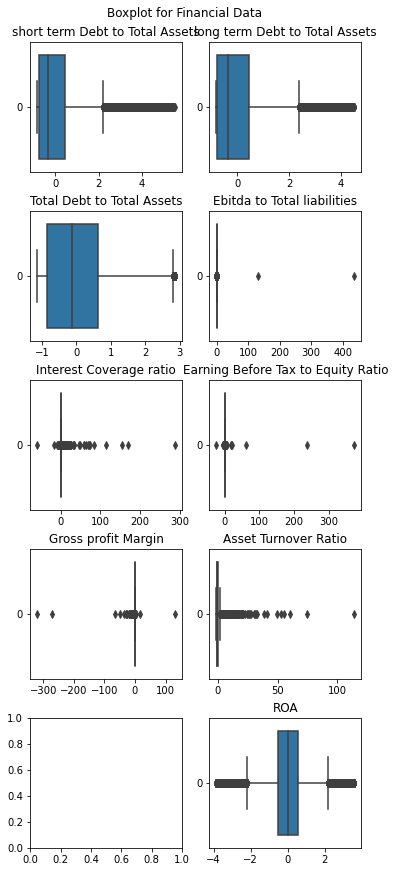

In [44]:
fig, axes = plt.subplots(5,2, figsize=(5, 12),constrained_layout = True)
fig.suptitle('Boxplot for Financial Data')

sns.boxplot(ax= axes[0,0], data=df_ratio_scaled_range['STDTA'],orient = "h" )
axes[0,0].set_title('short term Debt to Total Assets')

sns.boxplot(ax=axes[0,1], data=df_ratio_scaled_range['LDTA'],orient = "h" )
axes[0,1].set_title('long term Debt to Total Assets')

sns.boxplot(ax=axes[1,0], data=df_ratio_scaled_range['TDTA'],orient = "h" )
axes[1,0].set_title('Total Debt to Total Assets')

sns.boxplot(ax=axes[1,1], data=df_ratio_scaled_range['EDLT'],orient = "h" )
axes[1,1].set_title('Ebitda to Total liabilities')

sns.boxplot(ax=axes[2,0], data=df_ratio_scaled_range['ICRI'],orient = "h" )
axes[2,0].set_title('Interest Coverage ratio')

sns.boxplot(ax=axes[2,1], data=df_ratio_scaled_range['EDEQ'],orient = "h" )
axes[2,1].set_title('Earning Before Tax to Equity Ratio')

sns.boxplot(ax=axes[3,0], data=df_ratio_scaled_range['EDRV'],orient = "h" )
axes[3,0].set_title('Gross profit Margin')

sns.boxplot(ax=axes[3,1], data=df_ratio_scaled_range['RVAT'],orient = "h" )
axes[3,1].set_title('Asset Turnover Ratio')

sns.boxplot(ax=axes[4,1], data=df_ratio_scaled_range['ROA'],orient = "h" )
axes[4,1].set_title('ROA')

In [45]:
cols = ['STDTA', 'LDTA', 'TDTA', 'EDLT','ICRI', 'EDEQ', 'EDRV', 'RVAT', 'ROA']

x = df_ratio_scaled_range[cols]
y = df_ratio_scaled_range['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.555
Method:                 Least Squares   F-statistic:                          2.015e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:01:58   Log-Likelihood:                     -1.4732e+05
No. Observations:              145420   AIC:                                  2.947e+05
Df Residuals:                  145411   BIC:                                  2.948e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Residual Distribution of test Datasets')

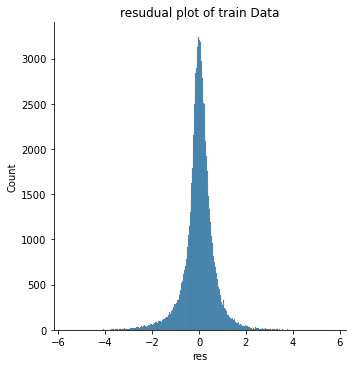

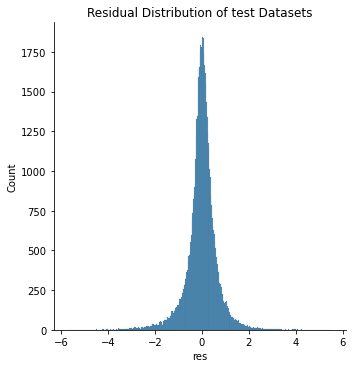

In [46]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
sns.displot(df.res)
plt.title('resudual plot of train Data')

sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')


## Using All Fin_ratio exceept current ROA

In [47]:
cols = ['STDTA', 'LDTA', 'TDTA', 'EDLT','ICRI', 'EDEQ', 'EDRV', 'RVAT']

x = df_ratio_scaled_range[cols]
y = df_ratio_scaled_range['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.053
Model:                            OLS   Adj. R-squared (uncentered):              0.053
Method:                 Least Squares   F-statistic:                              1025.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:02:02   Log-Likelihood:                     -2.0227e+05
No. Observations:              145420   AIC:                                  4.046e+05
Df Residuals:                  145412   BIC:                                  4.046e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

-0.00032638734481037646 0.0056501812171640365


Text(0.5, 1.0, 'Residual Distribution of tarin Datasets')

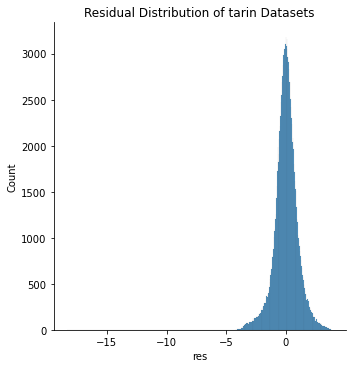

In [48]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
print(df.nxt_ROA_train.mean(),df1.nxt_ROA_test.mean())
sns.displot(df.res)
plt.title('Residual Distribution of tarin Datasets')

Text(0.5, 1.0, 'Residual Distribution of test Datasets')

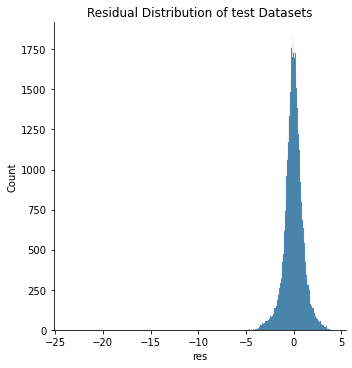

In [49]:
sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')

## Using  ROA Only

In [50]:
cols = [ 'ROA']
x = df_ratio_scaled_range[cols]
y = df_ratio_scaled_range['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.551
Method:                 Least Squares   F-statistic:                          1.786e+05
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:02:06   Log-Likelihood:                     -1.4791e+05
No. Observations:              145420   AIC:                                  2.958e+05
Df Residuals:                  145419   BIC:                                  2.958e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.0016051032777881953 0.0011433800949733806


Text(0.5, 1.0, 'Residual Distribution of test Datasets')

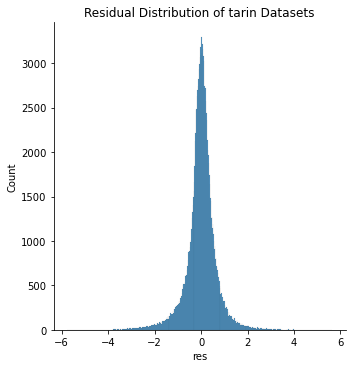

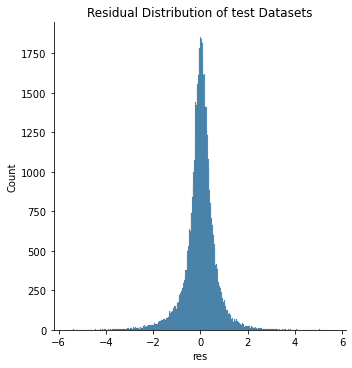

In [51]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
print(df.nxt_ROA_train.mean(),df1.nxt_ROA_test.mean())
sns.displot(df.res)
plt.title('Residual Distribution of tarin Datasets')

sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')

## Without Standarization 

[Text(0, 0.5, 'STDTA'),
 Text(0, 1.5, 'LDTA'),
 Text(0, 2.5, 'TDTA'),
 Text(0, 3.5, 'EDLT'),
 Text(0, 4.5, 'ICRI'),
 Text(0, 5.5, 'EDEQ'),
 Text(0, 6.5, 'EDRV'),
 Text(0, 7.5, 'RVAT'),
 Text(0, 8.5, 'ROA'),
 Text(0, 9.5, 'nxt_ROA')]

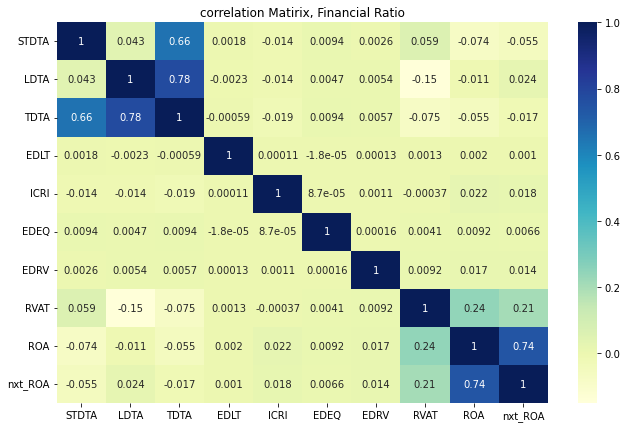

In [52]:
cols = ['STDTA', 'LDTA', 'TDTA', 'EDLT','ICRI', 'EDEQ', 'EDRV', 'RVAT', 'ROA', 'nxt_ROA']

plt.figure(figsize = (11,7))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix, Financial Ratio')
g = sns.heatmap(df_ratio[cols].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

In [53]:
## Use Only  ROA as a EXOGENEOUS VARAIBLE
cols = [ 'ROA']

x = df_ratio[cols]
y = df_ratio['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                          4.362e+05
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:02:11   Log-Likelihood:                      1.8584e+05
No. Observations:              145903   AIC:                                 -3.717e+05
Df Residuals:                  145902   BIC:                                 -3.717e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
##  Perfomance Matrics

print('R2 for Train data',result.rsquared)

## root mean square of error
print('RMSE for Test data',np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 


R2 for Train data 0.7493361100792842
RMSE for Test data 0.06844420448152347
RMSE for Train data 0.06844420448152347


0.09216369496717665 0.09188038305979372


Text(0.5, 1.0, 'Residual Distribution of test Datasets')

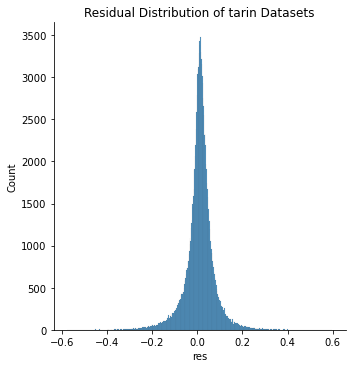

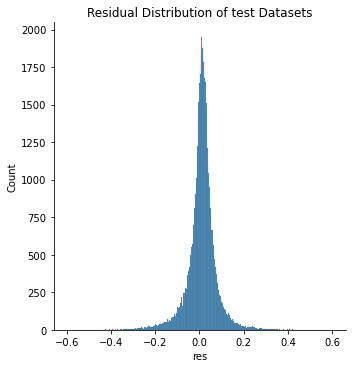

In [55]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
print(df.nxt_ROA_train.mean(),df1.nxt_ROA_test.mean())
sns.displot(df.res)
plt.title('Residual Distribution of tarin Datasets')
sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')

In [56]:
cols = ['STDTA', 'LDTA','ICRI', 'RVAT' ,'ROA']

x = df_ratio[cols]
y = df_ratio['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                          9.193e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:02:15   Log-Likelihood:                      1.8866e+05
No. Observations:              145903   AIC:                                 -3.773e+05
Df Residuals:                  145898   BIC:                                 -3.773e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
cols = ['STDTA', 'LDTA', 'TDTA', 'EDLT','ICRI', 'EDEQ', 'EDRV', 'RVAT', 'ROA']

x = df_ratio[cols] 
y = df_ratio['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                          5.083e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:02:15   Log-Likelihood:                      1.8839e+05
No. Observations:              145903   AIC:                                 -3.768e+05
Df Residuals:                  145894   BIC:                                 -3.767e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Perfomance Matrics

In [58]:
##  Perfomance Matrics

print('R2 for Train data',result.rsquared)

## root mean square of error
print('RMSE for Test data',np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 


R2 for Train data 0.7582161422304332
RMSE for Test data 0.06663349638992387
RMSE for Train data 0.06663349638992387


0.0920679985104276 0.09210367071118261


Text(0.5, 1.0, 'Residual Distribution of tarin Datasets')

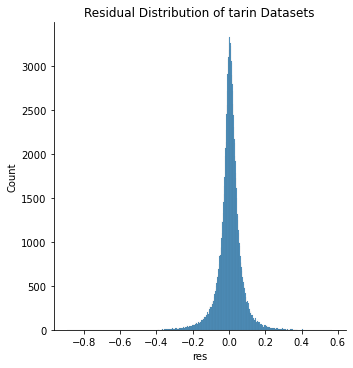

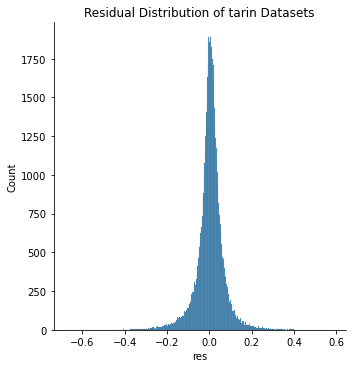

In [59]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
print(df.nxt_ROA_train.mean(),df1.nxt_ROA_test.mean())
sns.displot(df.res)
plt.title('Residual Distribution of tarin Datasets')

sns.displot(df1.res)
plt.title('Residual Distribution of tarin Datasets')

## Decision Tree

In [60]:
from sklearn.tree  import DecisionTreeRegressor 
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

In [61]:
cols = ['STDTA', 'LDTA', 'TDTA', 'EDLT','ICRI', 'EDEQ', 'EDRV', 'RVAT', 'ROA']
x = df_ratio_scaled_range[cols]
y = df_ratio_scaled_range['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

### Hyper parameters range intialization for tuning 

In [80]:

parameters={ 
            "splitter":["best", "random"],
            "max_depth" : [4,5],
           "min_samples_leaf":[100,500,1000,2000,3000,5000,7000],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto"],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
              }

In [81]:
reg_decision_model=DecisionTreeRegressor()

In [82]:
tuning_model= RandomizedSearchCV(reg_decision_model,param_distributions=parameters, scoring='neg_mean_squared_error',cv=3,verbose=3)

In [83]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3000, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.646 total time=   0.1s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3000, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.658 total time=   0.1s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3000, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.665 total time=   0.1s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5000, min_weight_fraction_leaf=0.0, splitter=best;, score=-0.438 total time=   0.7s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5000, min_weight_fraction_leaf=0.0, splitter=best;, score=-0.447 total time=   0.6s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5000, min_weight_fraction_leaf=0.

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [4, 5],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [100, 500, 1000,
                                                             2000, 3000, 5000,
                                                             7000],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5,
                                                                     0.6, 0.7,
                                                                     0.8, 0.9],
                                

In [84]:
tuned_model = tuning_model.best_estimator_

In [85]:
tuning_model.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_leaf': 5000,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 4}

"""
{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_leaf': 5000,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 4}"""

In [87]:
tuning_model.best_score_  ## negative of Mean square Error values

-0.44710482724015826

In [88]:
print('R2: ', r2_score(y_pred = tuning_model.predict(X_train), y_true = y_train))

R2:  0.5567001713882521


## Performance Matrics 

In [91]:
## root mean square of error
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test,tuned_model.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_train,tuned_model.predict(X_train)))) 


RMSE for Test data 0.6680507918454986
RMSE for Train data 0.6651639627630231


In [92]:
## Flow Chart of Decisin Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(25,20), dpi=1000)
tree.plot_tree(tuned_model,feature_names = cols,class_names='nxt_ROA',filled = True)
fig.savefig('Decision_tree.png')

0.003301560927277307 -0.002815012013697554


Text(0.5, 1.0, 'Residual Distribution of tarin Datasets')

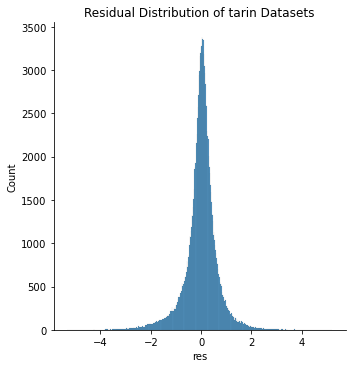

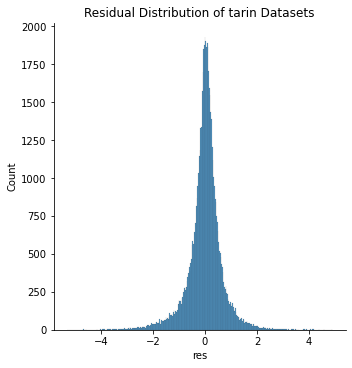

In [93]:
y_train_pred = tuned_model.predict(X_train)
y_test_pred = tuned_model.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
print(df.nxt_ROA_train.mean(),df1.nxt_ROA_test.mean())
sns.displot(df.res)
plt.title('Residual Distribution of tarin Datasets')

sns.displot(df1.res)
plt.title('Residual Distribution of tarin Datasets')

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02586
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.14500
Feature: 6, Score: 0.00336
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.82578


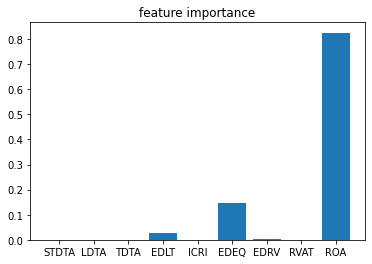

In [94]:
importance = tuned_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar(cols, importance)
plt.title('feature importance')
fig.savefig('features_imp.png')